# Wine Dataset for Clustering
Cluster wines based on their chemical constituents 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# EDA

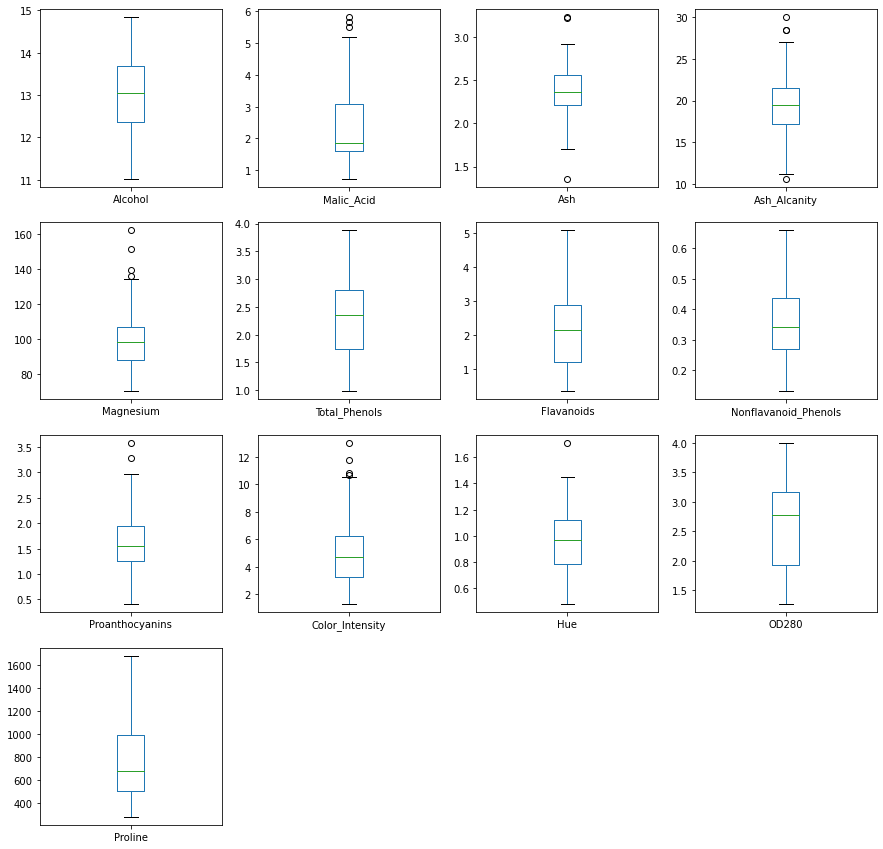

In [7]:
df.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

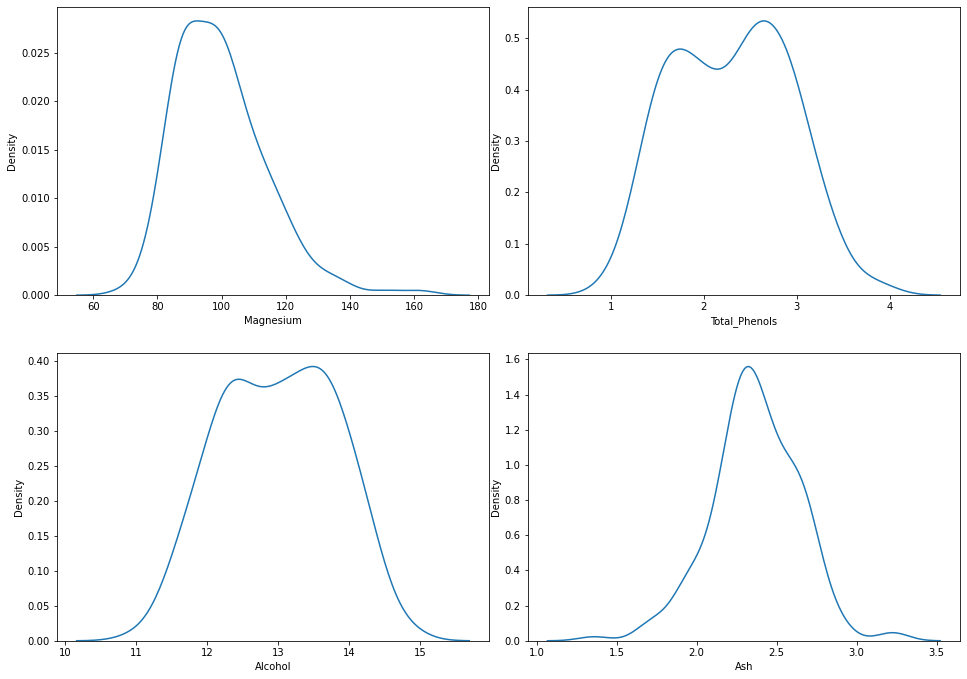

In [96]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.kdeplot(data=df,x='Alcohol')
ax2 = fig.add_axes([1.09,0,1,1])
sns.kdeplot(data=df,x='Ash')
ax3 = fig.add_axes([0,1.2,1,1])
sns.kdeplot(data=df,x='Magnesium')
ax4 = fig.add_axes([1.09,1.2,1,1])
sns.kdeplot(data=df,x='Total_Phenols') 

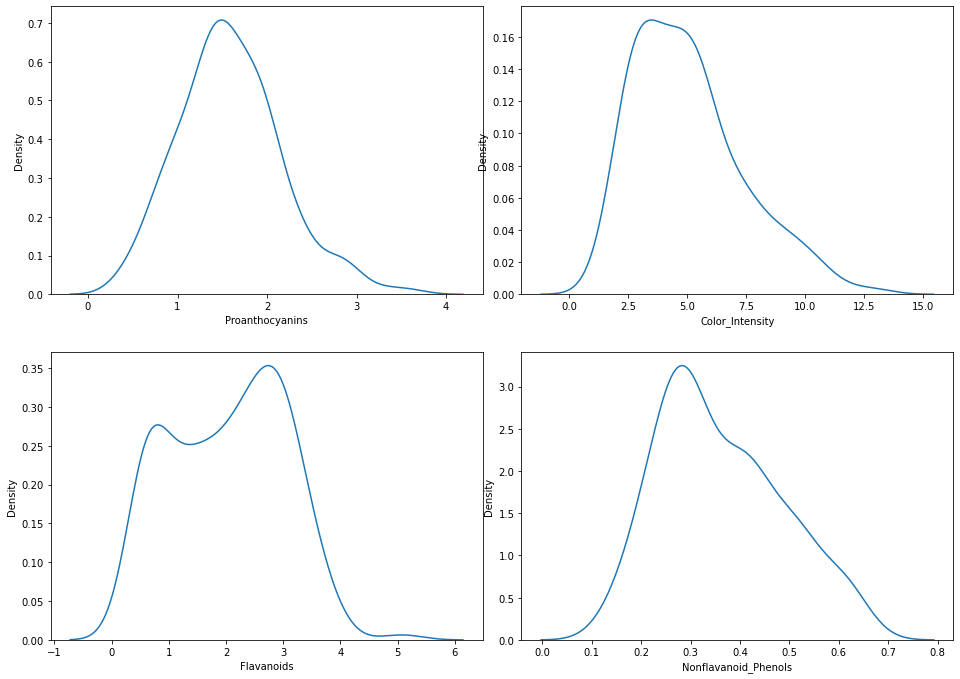

In [97]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.kdeplot(data=df,x='Flavanoids')
ax2 = fig.add_axes([1.09,0,1,1])
sns.kdeplot(data=df,x='Nonflavanoid_Phenols')
ax3 = fig.add_axes([0,1.2,1,1])
sns.kdeplot(data=df,x='Proanthocyanins')
ax4 = fig.add_axes([1.09,1.2,1,1])
sns.kdeplot(data=df,x='Color_Intensity')

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [11]:
scaled_X = scale.fit_transform(df)

In [13]:
scaled_X = pd.DataFrame(data=scaled_X,columns=df.columns)

In [14]:
scaled_X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
model_PCA = PCA(n_components=2)

In [17]:
pc = model_PCA.fit_transform(scaled_X)

# Model training

In [113]:
from sklearn.cluster import AgglomerativeClustering,KMeans

In [114]:
model = KMeans()

In [115]:
model.fit_predict(pc)

array([7, 6, 0, 7, 6, 7, 0, 0, 0, 0, 7, 6, 0, 7, 7, 0, 0, 0, 7, 0, 0, 6,
       6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 6, 0, 6, 6, 6, 6, 2, 0, 0, 6, 0, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 5, 1, 1, 5, 2, 5, 2,
       2, 5, 1, 2, 1, 2, 1, 0, 2, 5, 5, 1, 2, 2, 5, 2, 5, 4, 2, 2, 5, 5,
       1, 5, 5, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 5, 5, 5, 5, 1, 5, 1, 5, 2,
       2, 5, 1, 5, 5, 5, 5, 5, 1, 5, 2, 6, 1, 1, 2, 5, 5, 1, 5, 1, 1, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3])

# elbow Method

In [116]:
inertia = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    cluster = model.fit_predict(pc)
    inertia.append(model.inertia_)

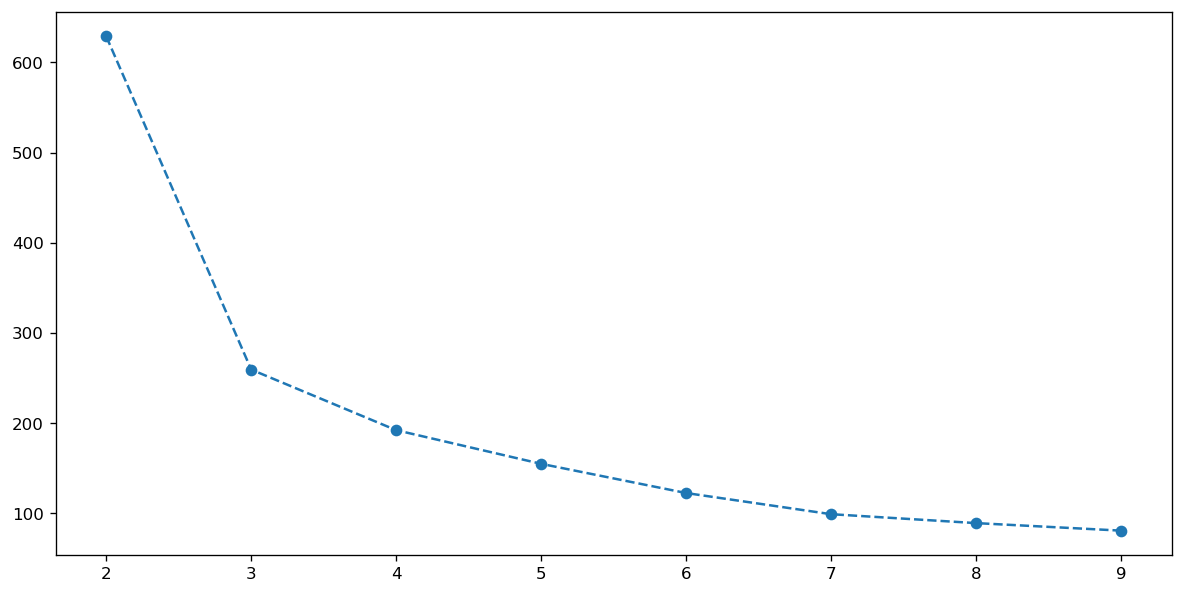

In [117]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(range(2,10),inertia,'o--')

# After Elbow Method

In [118]:
model = KMeans(n_clusters=3)

In [119]:
clusters = model.fit_predict(pc)

Text(0.5, 1.0, 'Kmeans')

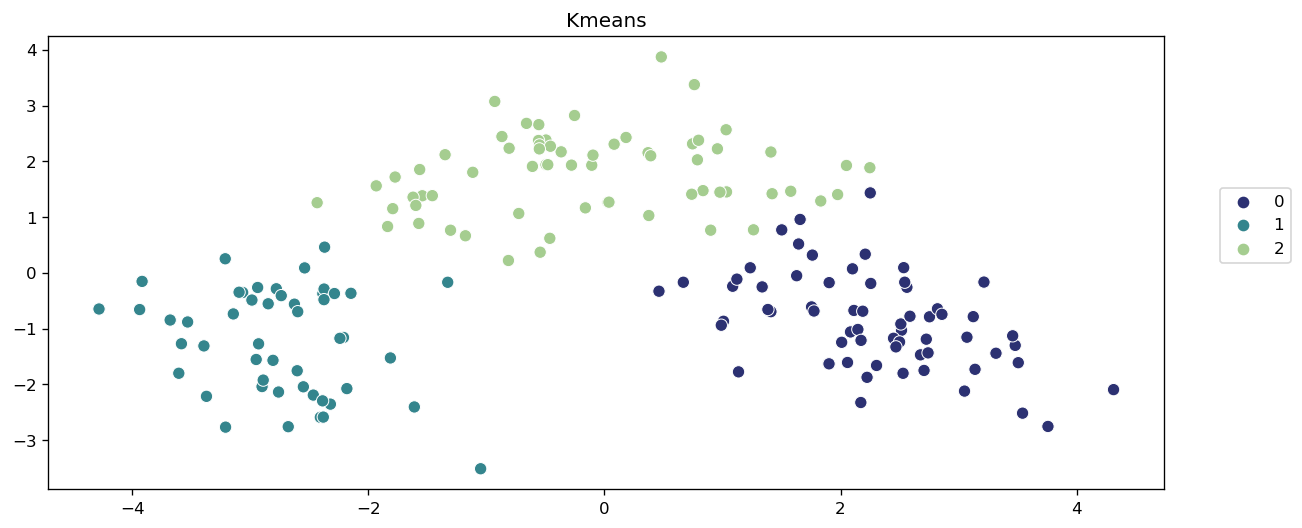

In [127]:
plt.figure(figsize=(12,5),dpi=120)
sns.scatterplot(x=pc[:,0],y=pc[:,1],hue=clusters,palette='crest_r',s=55)
plt.legend(loc=(1.05,0.5))
plt.title('Kmeans')